In [1]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

In [2]:
#!pip install -U numpy

In [3]:
#!pip install -U pandas

In [4]:
#!pip install -U matplotlib

In [5]:
#!pip install -U lifelines

In [6]:
#!python -m pip install --upgrade pip

In [7]:
#!pip install lifelines

## Univariate Cox, Multivariate Cox

In [8]:
from IPython.display import Image

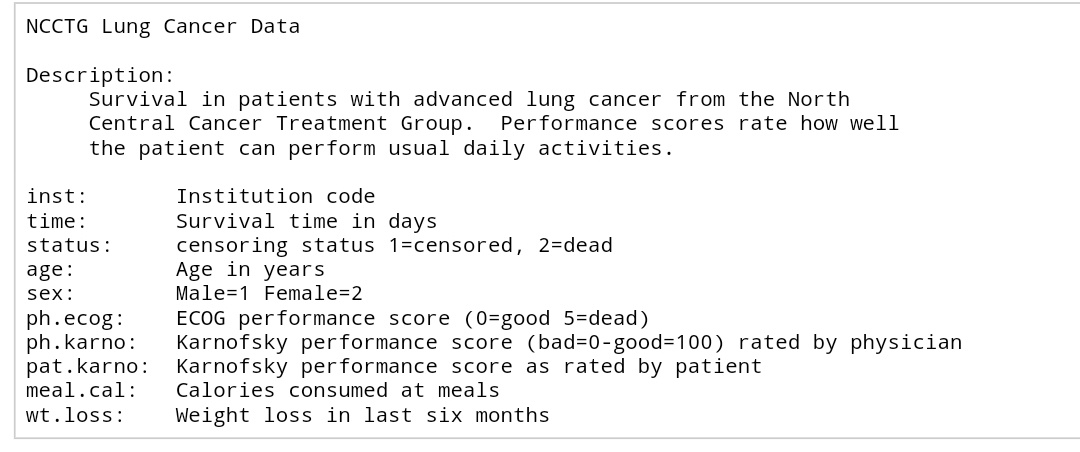

In [9]:
Image("variable_information.jpg")

<variable 설명>

inst : 기관 코드(불필요)

**continuous** : meal.cal, wt.loss, age, time

**ordinal** : ph.ecog, ph.karno, pat.karno

**nominal** : sex, status

In [10]:
data = pd.read_csv("lung.csv")

In [11]:
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [12]:
data.shape

(228, 10)

In [13]:
data = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno','pat.karno', 'meal.cal', 'wt.loss']]
data["sex"] = data["sex"] - 1
data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,0,1.0,90.0,100.0,1175.0,NaN
1,455,1,68,0,0.0,90.0,90.0,1225.0,15.0
2,1010,0,56,0,0.0,90.0,90.0,NaN,15.0
3,210,1,57,0,1.0,90.0,60.0,1150.0,11.0
4,883,1,60,0,0.0,100.0,90.0,NaN,0.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       228 non-null    int64  
 1   status     228 non-null    int64  
 2   age        228 non-null    int64  
 3   sex        228 non-null    int64  
 4   ph.ecog    227 non-null    float64
 5   ph.karno   227 non-null    float64
 6   pat.karno  225 non-null    float64
 7   meal.cal   181 non-null    float64
 8   wt.loss    214 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 16.2 KB


In [15]:
data["ph.karno"].fillna(data["ph.karno"].mean(), inplace = True)
data["pat.karno"].fillna(data["pat.karno"].mean(), inplace = True)
data["meal.cal"].fillna(data["meal.cal"].mean(), inplace = True)
data["wt.loss"].fillna(data["wt.loss"].mean(), inplace = True)
data["ph.ecog"].fillna(data["ph.ecog"].mean(), inplace = True) # 나중에 내가 추가한 부분
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       228 non-null    int64  
 1   status     228 non-null    int64  
 2   age        228 non-null    int64  
 3   sex        228 non-null    int64  
 4   ph.ecog    228 non-null    float64
 5   ph.karno   228 non-null    float64
 6   pat.karno  228 non-null    float64
 7   meal.cal   228 non-null    float64
 8   wt.loss    228 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 16.2 KB


In [16]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       228 non-null    int64  
 1   status     228 non-null    int64  
 2   age        228 non-null    int64  
 3   sex        228 non-null    int64  
 4   ph.ecog    228 non-null    float64
 5   ph.karno   228 non-null    float64
 6   pat.karno  228 non-null    float64
 7   meal.cal   228 non-null    float64
 8   wt.loss    228 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 16.2 KB


In [17]:
coxph = CoxPHFitter()
data_age = data[['time', 'status', 'age']]
coxph.fit(data_age, duration_col = 'time', event_col = 'status')
coxph.print_summary()

D:\Anaconda\envs\biostat\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 228
number of events observed = 165
   partial log-likelihood = -747.79
         time fit was run = 2022-09-15 09:14:20 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.02       1.02       0.01             0.00             0.04                 1.00                 1.04

            cmp to    z    p   -log2(p)
covariate                              
age           0.00 2.03 0.04       4.58
---
Concordance = 0.55
Partial AIC = 1497.58
log-likelihood ratio test = 4.24 on 1 df
-log2(p) of ll-ratio test = 4.66

In [18]:
coxph.check_assumptions(data_age, p_value_threshold=0.05)

Proportional hazard assumption looks okay.


[]

In [19]:
coxph = CoxPHFitter()
coxph.fit(data, duration_col = 'time', event_col = 'status')


<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>

In [20]:
coxph.print_summary()

D:\Anaconda\envs\biostat\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 228
number of events observed = 165
   partial log-likelihood = -731.38
         time fit was run = 2022-09-15 09:14:21 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.59       0.56       0.17            -0.92            -0.25                 0.40                 0.78
ph.ecog     0.58       1.79       0.18             0.23             0.94                 1.25                 2.57
ph.karno    0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.31   0.19       2.39
sex           0.00 -3.46 <0.005      10.83
ph.ecog       0.00  3.19 <0.005       9.45
ph.karno      0.00  1.47   0.14       2.83
pat.karno     0.00 -1.78   0.08       3.72
meal.cal      0.00  0.15   0.88       0.19
wt.loss       0.00 -1.61   0.11       3.21
---
Concordance = 0.65
Partial AIC = 1476.76
log-likelihood ratio test = 37.06 on 7 df
-log2(p) of ll-ratio test = 17.74

In [21]:
coxph.check_assumptions(data, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



D:\Anaconda\envs\biostat\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              0.36 0.55      0.87
          rank            0.14 0.71      0.50
meal.cal  km              5.14 0.02      5.42
          rank            4.54 0.03      4.92
pat.karno km              0.44 0.51      0.97
          rank            0.39 0.53      0.92
ph.ecog   km              1.75 0.19      2.43
          rank            1.41 0.23      2.09
ph.karno  km              4.48 0.03      4.87
          rank            3.92 0.05      4.39
sex       km              2.86 0.09      3.46
          rank            2.73 0.10      3.35
wt.loss   km              0.00 0.98      0.02
          rank            0.01 0.94      0.09



1. Variable 'ph.karno' failed the non-proportional test: p-value is 0.0343.

   Advice 1: the functional form of the variable 'ph.karno' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ph.karno' using pd.cut, and then specify it in
`strata=['ph.karno', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'meal.cal' failed the non-proportional test: p-value is 0.0234.

   Advice 1: the functional form of the variable 'meal.cal' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional

[]

In [22]:
data_1 = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno','pat.karno', 'wt.loss']]

In [404]:
coxph.fit(data_1, duration_col = 'time', event_col = 'status')

<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>

In [405]:
coxph.print_summary()

D:\Anaconda\envs\biostat\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 228
number of events observed = 165
   partial log-likelihood = -731.39
         time fit was run = 2022-09-15 09:10:27 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.59       0.55       0.17            -0.92            -0.26                 0.40                 0.77
ph.ecog     0.58       1.79       0.18             0.23             0.94                 1.25                 2.57
ph.karno    0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.30   0.19       2.37
sex           0.00 -3.51 <0.005      11.10
ph.ecog       0.00  3.19 <0.005       9.45
ph.karno      0.00  1.48   0.14       2.84
pat.karno     0.00 -1.78   0.08       3.72
wt.loss       0.00 -1.60   0.11       3.19
---
Concordance = 0.65
Partial AIC = 1474.78
log-likelihood ratio test = 37.04 on 6 df
-log2(p) of ll-ratio test = 19.14

In [406]:
coxph.check_assumptions(data_1, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



D:\Anaconda\envs\biostat\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              0.05 0.82      0.29
          rank            0.00 0.98      0.03
pat.karno km              1.10 0.29      1.77
          rank            0.99 0.32      1.65
ph.ecog   km              1.65 0.20      2.33
          rank            1.32 0.25      2.00
ph.karno  km              4.61 0.03      4.98
          rank            4.04 0.04      4.49
sex       km              2.03 0.15      2.70
          rank            1.97 0.16      2.64
wt.loss   km              0.00 0.95      0.08
          rank            0.02 0.87      0.19



1. Variable 'ph.karno' failed the non-proportional test: p-value is 0.0317.

   Advice 1: the functional form of the variable 'ph.karno' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ph.karno' using pd.cut, and then specify it in
`strata=['ph.karno', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#

[]

### Calculate kernel matrix

- remaining variables 

1) continuous : age

2) ordinal : ph.ecog, ph.karno, pat.karno

3) nominal : sex


**K : kernel**

In [23]:
K_age = np.zeros(shape=(len(data_1),len(data_1)))

for i in range(len(data_1)):
    for j in range(len(data_1)):
        K_age[i, j] = (max(data_1["age"]) - min(data_1["age"])- abs(data_1["age"][i]-data_1["age"][j] )) /  (max(data_1["age"]) - min(data_1["age"]))
                                                                        
K_age

array([[1.        , 0.86046512, 0.58139535, ..., 0.97674419, 0.81395349,
        0.62790698],
       [0.86046512, 1.        , 0.72093023, ..., 0.8372093 , 0.95348837,
        0.76744186],
       [0.58139535, 0.72093023, 1.        , ..., 0.55813953, 0.76744186,
        0.95348837],
       ...,
       [0.97674419, 0.8372093 , 0.55813953, ..., 1.        , 0.79069767,
        0.60465116],
       [0.81395349, 0.95348837, 0.76744186, ..., 0.79069767, 1.        ,
        0.81395349],
       [0.62790698, 0.76744186, 0.95348837, ..., 0.60465116, 0.81395349,
        1.        ]])

In [24]:
K_ph_ecog = np.zeros(shape=(len(data_1),len(data_1)))

for i in range(len(data_1)):
    for j in range(len(data_1)):
        K_ph_ecog[i, j] = (max(data_1["ph.ecog"]) - min(data_1["ph.ecog"])- abs(data_1["ph.ecog"][i]-data_1["ph.ecog"][j] )) /  (max(data_1["ph.ecog"]) - min(data_1["ph.ecog"]))
                                                                        
K_ph_ecog

array([[1.        , 0.66666667, 0.66666667, ..., 0.66666667, 1.        ,
        1.        ],
       [0.66666667, 1.        , 1.        , ..., 0.33333333, 0.66666667,
        0.66666667],
       [0.66666667, 1.        , 1.        , ..., 0.33333333, 0.66666667,
        0.66666667],
       ...,
       [0.66666667, 0.33333333, 0.33333333, ..., 1.        , 0.66666667,
        0.66666667],
       [1.        , 0.66666667, 0.66666667, ..., 0.66666667, 1.        ,
        1.        ],
       [1.        , 0.66666667, 0.66666667, ..., 0.66666667, 1.        ,
        1.        ]])

In [25]:
K_ph_karno = np.zeros(shape=(len(data_1),len(data_1)))

for i in range(len(data_1)):
    for j in range(len(data_1)):
        K_ph_karno[i, j] = (max(data_1["ph.karno"]) - min(data_1["ph.karno"])- abs(data_1["ph.karno"][i]-data_1["ph.karno"][j] )) /  (max(data_1["ph.karno"]) - min(data_1["ph.karno"]))
                                                                        
K_ph_karno

array([[1. , 1. , 1. , ..., 0.4, 1. , 0.8],
       [1. , 1. , 1. , ..., 0.4, 1. , 0.8],
       [1. , 1. , 1. , ..., 0.4, 1. , 0.8],
       ...,
       [0.4, 0.4, 0.4, ..., 1. , 0.4, 0.6],
       [1. , 1. , 1. , ..., 0.4, 1. , 0.8],
       [0.8, 0.8, 0.8, ..., 0.6, 0.8, 1. ]])

In [26]:
K_pat_karno = np.zeros(shape=(len(data_1),len(data_1)))

for i in range(len(data_1)):
    for j in range(len(data_1)):
        K_pat_karno[i, j] = (max(data_1["pat.karno"]) - min(data_1["pat.karno"])- abs(data_1["pat.karno"][i]-data_1["pat.karno"][j] )) /  (max(data_1["pat.karno"]) - min(data_1["pat.karno"]))
                                                                        
K_pat_karno

array([[1.        , 0.85714286, 0.85714286, ..., 0.57142857, 1.        ,
        0.85714286],
       [0.85714286, 1.        , 1.        , ..., 0.71428571, 0.85714286,
        1.        ],
       [0.85714286, 1.        , 1.        , ..., 0.71428571, 0.85714286,
        1.        ],
       ...,
       [0.57142857, 0.71428571, 0.71428571, ..., 1.        , 0.57142857,
        0.71428571],
       [1.        , 0.85714286, 0.85714286, ..., 0.57142857, 1.        ,
        0.85714286],
       [0.85714286, 1.        , 1.        , ..., 0.71428571, 0.85714286,
        1.        ]])

In [27]:
K_sex = np.zeros(shape=(len(data_1), len(data_1)))

for i in range(len(data_1)):
    for j in range(len(data_1)):
        K_sex[i,j] = 1 if data_1["sex"][i] == data_1["sex"][j] else 0
    
K_sex

array([[1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

### Find final cox model

In [28]:
data_fin = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno']]

In [29]:
coxph.fit(data_fin, duration_col = 'time', event_col = 'status')

<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>

In [30]:
coef = coxph.params_
coef

covariate
age         0.012334
sex        -0.584163
ph.ecog     0.625237
ph.karno    0.011555
Name: coef, dtype: float64

### Find final kernel matrix using coxph coefficients

In [31]:
fin_kernel = (coef[0]*K_age + coef[1]*K_sex + coef[2]*K_ph_ecog + coef[3]*K_ph_karno) / sum(coef)

In [32]:
fin_kernel

array([[ 1.        , -2.23466995, -2.28765353, ...,  6.67294611,
         0.96467761,  9.88604207],
       [-2.23466995,  1.        ,  0.94701642, ...,  3.43827617,
        -2.21700876,  6.7043557 ],
       [-2.28765353,  0.94701642,  1.        , ...,  3.38529259,
        -2.25233114,  6.73967809],
       ...,
       [ 6.67294611,  3.43827617,  3.38529259, ...,  1.        ,
         6.63762373, -2.3543855 ],
       [ 0.96467761, -2.21700876, -2.25233114, ...,  6.63762373,
         1.        ,  9.92136445],
       [ 9.88604207,  6.7043557 ,  6.73967809, ..., -2.3543855 ,
         9.92136445,  1.        ]])

In [33]:
fin_kernel.shape

(228, 228)

### using scikit-survival package

refered :

https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.svm.FastKernelSurvivalSVM.html

https://www.jmlr.org/papers/volume21/20-729/20-729.pdf

https://notebook.community/sebp/scikit-survival/examples/survival-svm

https://stats.stackexchange.com/questions/92101/prediction-with-scikit-and-an-precomputed-kernel-svm

In [418]:
#!pip install -U scikit-survival

In [34]:
from sksurv.svm import FastKernelSurvivalSVM
from sksurv.column import encode_categorical
from sksurv.metrics import concordance_index_censored

## Setting kernel function

In [420]:
'''
class Mykernel:
    def __init__(self, data):
        self.matrix_con = np.zeros(shape=(len(data),len(data)))
        self.matrix_ord = np.zeros(shape=(len(data),len(data)))
        self.matrix_nom = np.zeros(shape=(len(data),len(data)))
        self.matrix_final = np.zeros(shape=(len(data), len(data)))
        
    def k_continuous(self):
        
        return
    
    def k_ordinal(self):
        ------
        return
        
    def k_nominal(self):
        
        return
        
    def k_final(self):
        self.matrix_final = 
        
        return
        
'''

'\nclass Mykernel:\n    def __init__(self, data):\n        self.matrix_con = np.zeros(shape=(len(data),len(data)))\n        self.matrix_ord = np.zeros(shape=(len(data),len(data)))\n        self.matrix_nom = np.zeros(shape=(len(data),len(data)))\n        self.matrix_final = np.zeros(shape=(len(data), len(data)))\n        \n    def k_continuous(self):\n        \n        return\n    \n    def k_ordinal(self):\n        ------\n        return\n        \n    def k_nominal(self):\n        \n        return\n        \n    def k_final(self):\n        self.matrix_final = \n        \n        return\n        \n'

In [421]:
'''
def Mykernel():
    
    if type() == continuous:
        return ~~
        
    elif type() == ordinal:
        return ~~
    
    elif type() == nominal:
        return ~~
'''

'\ndef Mykernel():\n    \n    if type() == continuous:\n        return ~~\n        \n    elif type() == ordinal:\n        return ~~\n    \n    elif type() == nominal:\n        return ~~\n'

### Compare 

In [35]:
from sksurv.svm import FastKernelSurvivalSVM
from sksurv.kernels import clinical_kernel
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV

In [43]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['Status'], y['Survival_in_days'], prediction)
    return result[0]

In [36]:
kernel_matrix = clinical_kernel(data_fin)

In [37]:
kernel_matrix

array([[1.        , 0.89677041, 0.59263833, ..., 0.47429512, 0.78069333,
        0.55017722],
       [0.89677041, 1.        , 0.69586792, ..., 0.37106553, 0.72397536,
        0.49345925],
       [0.59263833, 0.69586792, 1.        , ..., 0.40026678, 0.76868049,
        0.60017989],
       ...,
       [0.47429512, 0.37106553, 0.40026678, ..., 1.        , 0.63158629,
        0.80008689],
       [0.78069333, 0.72397536, 0.76868049, ..., 0.63158629, 1.        ,
        0.76850061],
       [0.55017722, 0.49345925, 0.60017989, ..., 0.80008689, 0.76850061,
        1.        ]])

종속변수 형식 안 맞으므로 많이 사용되는 데이터 들여다보기

In [425]:
data_x, y = load_veterans_lung_cancer()

In [426]:
y

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [427]:
y.shape

(137,)

In [428]:
type(y[0])

numpy.void

In [429]:
type(y[0][0]), type(y[0][1])

(numpy.bool_, numpy.float64)

In [38]:
# 형식 맞춰 새로운 dtype 생성
dt = np.dtype([('status', np.bool_), ('time', np.int64 )])
my_y = np.empty(shape=(len(data),),dtype=dt)

for i in range(len(data)):
    my_y[i]=bool(data_fin.iloc[i]['status']), data_fin.iloc[i]['time']
    
my_y

array([( True,  306), ( True,  455), (False, 1010), ( True,  210),
       ( True,  883), (False, 1022), ( True,  310), ( True,  361),
       ( True,  218), ( True,  166), ( True,  170), ( True,  654),
       ( True,  728), ( True,   71), ( True,  567), ( True,  144),
       ( True,  613), ( True,  707), ( True,   61), ( True,   88),
       ( True,  301), ( True,   81), ( True,  624), ( True,  371),
       ( True,  394), ( True,  520), ( True,  574), ( True,  118),
       ( True,  390), ( True,   12), ( True,  473), ( True,   26),
       ( True,  533), ( True,  107), ( True,   53), ( True,  122),
       ( True,  814), (False,  965), ( True,   93), ( True,  731),
       ( True,  460), ( True,  153), ( True,  433), ( True,  145),
       ( True,  583), ( True,   95), ( True,  303), ( True,  519),
       ( True,  643), ( True,  765), ( True,  735), ( True,  189),
       ( True,   53), ( True,  246), ( True,  689), ( True,   65),
       ( True,    5), ( True,  132), ( True,  687), ( True,  3

In [39]:
my_y.shape

(228,)

기존 clinical kernel

In [63]:
param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
cv = ShuffleSplit(n_splits=20, test_size=0.4, random_state=0)
kssvm = FastKernelSurvivalSVM(kernel="precomputed", random_state=0)

In [64]:
kgcv = GridSearchCV(kssvm, param_grid,n_jobs=4, scoring='roc_auc', cv=cv)
kgcv = kgcv.fit(kernel_matrix, my_y)

D:\Anaconda\envs\biostat\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [60]:
kgcv.best_score_, kgcv.best_params_

(nan, {'alpha': 0.000244140625})

fin_kernel

In [59]:
kgcv = GridSearchCV(kssvm, param_grid,  n_jobs=4, scoring='roc_auc', cv=cv)
kgcv = kgcv.fit(fin_kernel, my_y)

D:\Anaconda\envs\biostat\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [61]:
kgcv.best_score_, kgcv.best_params_

(nan, {'alpha': 0.000244140625})

In [62]:
y_pred =kgcv.predict(data_fin)

D:\Anaconda\envs\biostat\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FastKernelSurvivalSVM was fitted without feature names
  warnings.warn(


ValueError: Precomputed metric requires shape (n_queries, n_indexed). Got (228, 6) for 228 indexed.

진욱 선배 code

In [300]:
def my_kernel(data):
    age = data['age']
    sex = data['sex']
    ecog = data['ph.ecog']
    karno = data['ph.karno']
    def c_o(data):
        data_matrix = np.eye(len(data))
        d = np.max(data) - np.min(data)
        for i in range(len(data)):
            for j in range(len(data)):
                data_matrix[i,j] = (d-np.abs(data[i]-data[j]))/d
        return data_matrix

    def nom(data):
        data_matrix = np.eye(len(data))
        for i in range(len(data)):
            for j in range(len(data)):
                if data[i] == data[j]:
                    data_matrix[i,j] = 1
                else:
                    data_matrix[i,j] = 0
        return data_matrix
    
    from lifelines import CoxPHFitter
    coxph = CoxPHFitter()
    coxph.fit(data, duration_col = 'time', event_col = 'status')
    coef = np.log(coxph.hazard_ratios_)

    sum_matrix = (coef[0]*c_o(age) + coef[1]*nom(sex) + coef[2]*c_o(ecog) + coef[3]*c_o(karno))/sum(coef)
    return sum_matrix

In [301]:
tu = data[['time','status']]
tu[['status']] = tu[['status']] > 0
tuple_a = tuple(map(tuple,tu[['status', 'time']].to_numpy()))
tuple_a

C:\Users\admin\AppData\Local\Temp\ipykernel_10524\1209999136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tu[['status']] = tu[['status']] > 0


((True, 306),
 (True, 455),
 (False, 1010),
 (True, 210),
 (True, 883),
 (False, 1022),
 (True, 310),
 (True, 361),
 (True, 218),
 (True, 166),
 (True, 170),
 (True, 654),
 (True, 728),
 (True, 71),
 (True, 567),
 (True, 144),
 (True, 613),
 (True, 707),
 (True, 61),
 (True, 88),
 (True, 301),
 (True, 81),
 (True, 624),
 (True, 371),
 (True, 394),
 (True, 520),
 (True, 574),
 (True, 118),
 (True, 390),
 (True, 12),
 (True, 473),
 (True, 26),
 (True, 533),
 (True, 107),
 (True, 53),
 (True, 122),
 (True, 814),
 (False, 965),
 (True, 93),
 (True, 731),
 (True, 460),
 (True, 153),
 (True, 433),
 (True, 145),
 (True, 583),
 (True, 95),
 (True, 303),
 (True, 519),
 (True, 643),
 (True, 765),
 (True, 735),
 (True, 189),
 (True, 53),
 (True, 246),
 (True, 689),
 (True, 65),
 (True, 5),
 (True, 132),
 (True, 687),
 (True, 345),
 (True, 444),
 (True, 223),
 (True, 175),
 (True, 60),
 (True, 163),
 (True, 65),
 (True, 208),
 (False, 821),
 (True, 428),
 (True, 230),
 (False, 840),
 (True, 305),


In [303]:
len(tuple_a)

228

다른 dataset

In [355]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV

from sksurv.datasets import load_veterans_lung_cancer
from sksurv.column import encode_categorical
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM

In [356]:
data_x, y = load_veterans_lung_cancer()
x = encode_categorical(data_x)

In [357]:
estimator = FastSurvivalSVM(optimizer="rbtree", max_iter=1000, tol=1e-6, random_state=0)

In [358]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['Status'], y['Survival_in_days'], prediction)
    return result[0]

In [359]:
param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
cv = ShuffleSplit(n_splits=200, test_size=0.5, random_state=0)
gcv = GridSearchCV(estimator, param_grid, scoring=score_survival_model,
                   n_jobs=4, refit=False,
                   cv=cv)

In [361]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
gcv = gcv.fit(x, y)


In [362]:
gcv.best_score_, gcv.best_params_

(0.718221596570157, {'alpha': 0.00390625})

In [363]:
kernel_matrix = clinical_kernel(data_x)
kssvm = FastKernelSurvivalSVM(optimizer="rbtree", kernel="precomputed", random_state=0)

In [366]:
kgcv = GridSearchCV(kssvm, param_grid,scoring=score_survival_model,
                    n_jobs=4, refit=False,
                    cv=cv)

In [367]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
kgcv = kgcv.fit(kernel_matrix, y)

In [368]:
kgcv.best_score_, kgcv.best_params_

(0.7071426137273039, {'alpha': 0.015625})

In [379]:
x

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...
132,65.0,1.0,0.0,0.0,75.0,1.0,0.0,1.0
133,64.0,1.0,0.0,0.0,60.0,5.0,0.0,1.0
134,67.0,1.0,0.0,0.0,70.0,18.0,1.0,1.0
135,65.0,1.0,0.0,0.0,80.0,4.0,0.0,1.0


In [378]:
x.columns

Index(['Age_in_years', 'Celltype=large', 'Celltype=smallcell',
       'Celltype=squamous', 'Karnofsky_score', 'Months_from_Diagnosis',
       'Prior_therapy=yes', 'Treatment=test'],
      dtype='object')

In [ ]:
def my_kernel(data):
    age = data['Age_in_years']
    sex = data['']
    ecog = data['ph.ecog']
    karno = data['ph.karno']
    def c_o(data):
        data_matrix = np.eye(len(data))
        d = np.max(data) - np.min(data)
        for i in range(len(data)):
            for j in range(len(data)):
                data_matrix[i,j] = (d-np.abs(data[i]-data[j]))/d
        return data_matrix

    def nom(data):
        data_matrix = np.eye(len(data))
        for i in range(len(data)):
            for j in range(len(data)):
                if data[i] == data[j]:
                    data_matrix[i,j] = 1
                else:
                    data_matrix[i,j] = 0
        return data_matrix
    
    from lifelines import CoxPHFitter
    coxph = CoxPHFitter()
    coxph.fit(data, duration_col = 'time', event_col = 'status')
    coef = np.log(coxph.hazard_ratios_)

    sum_matrix = (coef[0]*c_o(age) + coef[1]*nom(sex) + coef[2]*c_o(ecog) + coef[3]*c_o(karno))/sum(coef)
    return sum_matrix

In [369]:
kgcv = kgcv.fit(fin_kernel, y)

ValueError: Found input variables with inconsistent numbers of samples: [228, 137]

In [ ]:
kgcv.best_score_, kgcv.best_params_